/Users/sayoeweje/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 29576
  warnings.warn(
/Users/sayoeweje/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 29673
  warnings.warn(


{'GLU757': -0.218175072522873, 'LYS4': -0.259783641322055, 'SER6': -0.241235429770717, 'TYR5': -0.140717728189497, 'VAL20': -0.106862262632236, 'MET751': -0.131741802146478, 'ILE7': -0.101741845142118, 'PRO756': -0.121845940257406, 'HIS754': -0.259783641322055, 'LYS755': -0.265220919902432, 'ASN758': -0.0941076721565312, 'GLY8': -0.194262804887141, 'LEU9': 0.15601876548986, 'LEU747': -0.128463635205712, 'ALA991': -0.171980738206932, 'VAL760': 1.46201083442554, 'ALA987': 0.0663909806682692, 'TRP18': 1.45881659853501, 'ALA19': 1.04195274157512, 'GLY17': -0.0129122769550527, 'ALA10': -0.254968817686337, 'THR740': 4.99744174874837, 'VAL744': -0.214424748577239, 'ILE759': -0.137669787725386, 'ILE761': -0.158990757262348, 'LEU935': -0.250509535546386, 'ILE11': 4.83474579728727, 'GLU762': -0.222839216280774, 'GLY12': -0.22301409035987, 'MET763': 8.92893169701454, 'VAL931': 0.115352813708243, 'THR13': -0.252540826632068, 'SER15': 0.51549554390289, 'ASN14': -0.0896704734638181, 'GLU766': -0.235

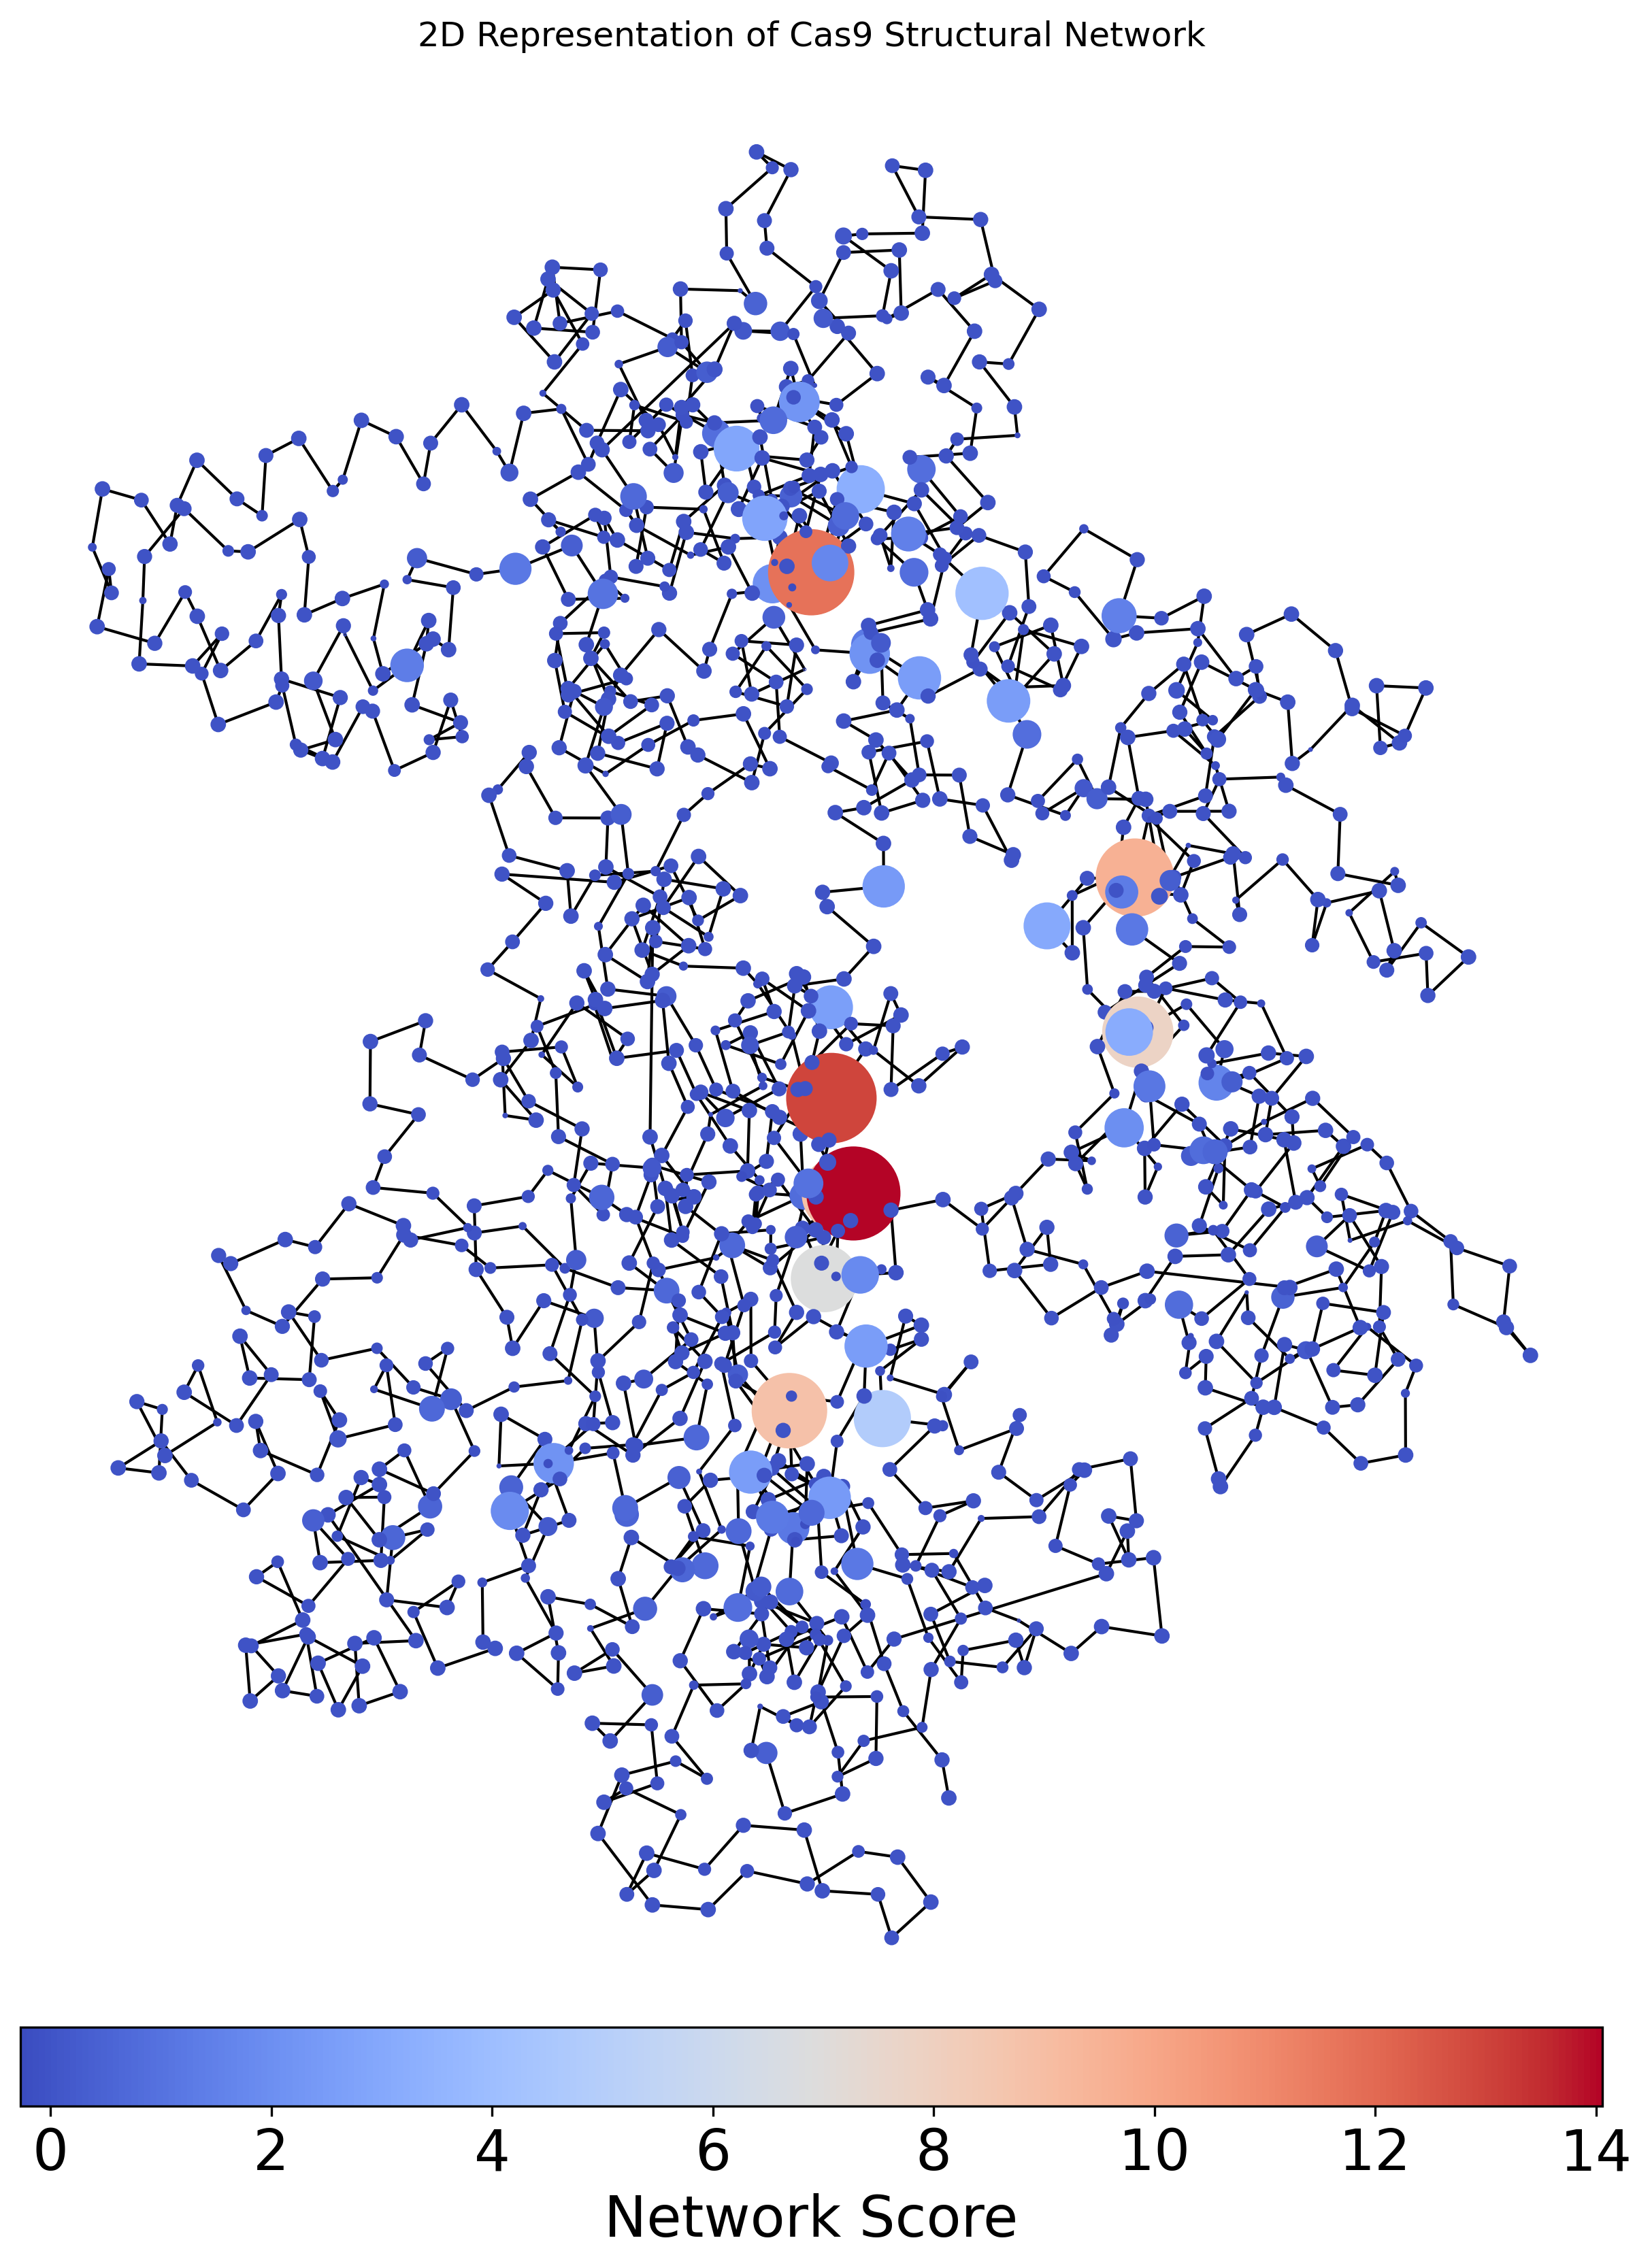

In [62]:
import scipy as sp
from pylab import *
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import networkx as nx
import seaborn as sns
import pandas as pd  
import collections
from IPython.display import clear_output
import random
from Bio.PDB.PDBParser import PDBParser
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

parser = PDBParser() # Initiates PDBParser object to read .pdb file
structure_id = "Cas9"
filename = "4oo8_Cas.pdb" # PDB file containing Cas9 + sgRNA, target DNA crystal structure
structure = parser.get_structure(structure_id, filename)

model = structure[0] # Get structural elements of pdb
protein = model["A"] # Selects Chain A in pdb file (Cas 9 protein)

NetworkScores = {}
with open("FinalSum") as file:
    for line in file:
 
        (key, value) = line.split()

        NetworkScores[key] = float(value)

print(NetworkScores)
graph = nx.Graph() 
locations = [] # Array to hold 3D positions of each residue in structure
for i in range(len(protein)):
    try:
        residue = protein[i+3] # Cas9 starts with a Lys3 (Res 1 and 2 undefined, 1-indexed)
        
        # Gets 3D location of residue based on alpha carbon position
        ca = residue["CA"].get_vector()

        residue_info = [residue.get_resname()+str(i+3), ca[0], ca[1], ca[2]] 
        locations.append(residue_info) # Add residue to location array

        # Creates node for residue in 2-D network, sets color
        networkscore_residue = NetworkScores.get(residue.get_resname()+str(i+3))
        residue_name = residue.get_resname()+str(i+3)
        graph.add_node(residue_name, pos=(ca[0], ca[1]), node_color = networkscore_residue, 
                       node_size = 20*abs(networkscore_residue/-0.271323607873502))
    except:
        # Exception for any residues that are missing from structure
        print("Cas9 Residue "+ str(residue) + ": This residue appears to be missing")

# Plots network
fig = figure(num=1, figsize=(10, 15), dpi=300)
ax  = fig.add_subplot(111)
pos = nx.get_node_attributes(graph,'pos')
node_size_dic = nx.get_node_attributes(graph,'node_size')

node_names = list(node_size_dic.keys())
for i in range(len(node_names)):
    try:
        graph.add_edge(node_names[i], node_names[i+1])
    except:
        print("End of node list")
    
node_size_array = list(node_size_dic.values())
node_colors = nx.get_node_attributes(graph, 'node_color')

g = nx.draw_networkx(graph, pos, node_size = node_size_array, 
                     node_color = node_size_array, with_labels = False, 
                                    cmap = plt.cm.coolwarm)

norm = mpl.colors.Normalize(vmin=min(list(NetworkScores.values())),vmax=max(list(NetworkScores.values())))

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=plt.cm.coolwarm), ax=ax, 
             orientation='horizontal', location='bottom', pad=0)

cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Network Score',size = 20)
ax.set_axis_off()
ax.set_title("2D Representation of Cas9 Structural Network")
ax.margins(x=0, y=0)

plt.savefig("4oo8_network.pdf", bbox_inches = 'tight',
    pad_inches = 0.5)



##### 